# Challenge set: Rare Diseases Data Science and Research

In [37]:
# Importing libraries
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Phenotypes dataset

In [17]:
# Converting XML file to pandas dataframe

data_for_df = []

root = ET.parse('phenotypes.xml').getroot()
hpo_disorder_set_status_list = root.findall('HPODisorderSetStatusList')[0]
hpo_disorder_set_statuses = hpo_disorder_set_status_list.findall('HPODisorderSetStatus')

for node in hpo_disorder_set_statuses:
    # Exactly 1 disorder per HPODisorderSetStatus
    disorder = node.findall('Disorder')[0]
    disorder_name = disorder.findall('Name')[0].text
    disorder_type = disorder.findall('DisorderType')[0].findall('Name')[0].text
    disorder_group = disorder.findall('DisorderGroup')[0].findall('Name')[0].text
    

    
    hpo_disorder_association_list = disorder.findall('HPODisorderAssociationList')[0]
    hpo_disorder_associations = hpo_disorder_association_list.findall('HPODisorderAssociation')
    
    for association in hpo_disorder_associations:
        hpo_term = association.findall('HPO')[0].findall('HPOTerm')[0].text
        hpo_freq = association.findall('HPOFrequency')[0].findall('Name')[0].text 
        
        data_for_df.append({'DisorderName' : disorder_name,
                            'DisorderType' : disorder_type,
                            'DisorderGroup' : disorder_group,
                            'AssociatedHPO' : hpo_term,
                            'HPOFrequency' : hpo_freq})
        
hpo_df = pd.DataFrame(data_for_df)  

#### Data sample

In [4]:
hpo_df.head()

,AssociatedHPO,DisorderGroup,DisorderName,DisorderType,HPOFrequency
0,Macrocephaly,Disorder,Alexander disease,Disease,Very frequent (99-80%)
1,Intellectual disability,Disorder,Alexander disease,Disease,Very frequent (99-80%)
2,Seizures,Disorder,Alexander disease,Disease,Very frequent (99-80%)
3,Spasticity,Disorder,Alexander disease,Disease,Very frequent (99-80%)
4,Agenesis of corpus callosum,Disorder,Alexander disease,Disease,Very frequent (99-80%)


#### Basic Data Info

In [5]:
hpo_df.describe()

,AssociatedHPO,DisorderGroup,DisorderName,DisorderType,HPOFrequency
count,102872,102872,102872,102872,102872
unique,7684,3,4039,11,6
top,Seizures,Disorder,Williams syndrome,Disease,Occasional (29-5%)
freq,961,90413,187,51053,36056


#### Unique Values: 

In [ ]:
# Checking unique values

print(hpo_df['DisorderGroup'].unique())
print('\n')
print(hpo_df['DisorderType'].unique())
print('\n')
print(hpo_df['HPOFrequency'].unique())

#### One disease data sample

In [8]:
# One disease data sample

alexander_disease = hpo_df[(hpo_df.DisorderName == "Alexander disease")]
print(alexander_disease.head())
print('...')
print(alexander_disease.tail())

                 AssociatedHPO DisorderGroup       DisorderName DisorderType  \
0                 Macrocephaly      Disorder  Alexander disease      Disease   
1      Intellectual disability      Disorder  Alexander disease      Disease   
2                     Seizures      Disorder  Alexander disease      Disease   
3                   Spasticity      Disorder  Alexander disease      Disease   
4  Agenesis of corpus callosum      Disorder  Alexander disease      Disease   

             HPOFrequency  
0  Very frequent (99-80%)  
1  Very frequent (99-80%)  
2  Very frequent (99-80%)  
3  Very frequent (99-80%)  
4  Very frequent (99-80%)  
...
              AssociatedHPO DisorderGroup       DisorderName DisorderType  \
56             Dysautonomia      Disorder  Alexander disease      Disease   
57       Bowel incontinence      Disorder  Alexander disease      Disease   
58            Hyperlordosis      Disorder  Alexander disease      Disease   
59      Hyperpigmented nevi      Disord

#### Exploring disorder - phenotype association

How many HPO are associated with every disorder?

In [7]:
# Check how many HPO are associated with every disorder

agg_df = hpo_df.groupby(['DisorderName']).aggregate({'AssociatedHPO': 'count'})
agg_df = agg_df.sort_values(by='AssociatedHPO')

In [29]:
print("Disorders with lowest number of associated HPO:")
print(agg_df.head(10))
print('\n')
print("Disorders with highest number of associated HPO:")
print(agg_df.tail(10))

Disorders with lowest number of associated HPO:
                                                    AssociatedHPO
DisorderName                                                     
Laryngeal abductor paralysis                                    2
Idiopathic steroid-sensitive nephrotic syndrome                 2
Diffuse palmoplantar keratoderma-acrocyanosis s...              2
Hallux varus-preaxial polysyndactyly syndrome                   2
Familial supernumerary nipples                                  2
Bifid nose                                                      2
Neurofibromatosis type 6                                        2
Neuroblastoma                                                   2
Vacuolar myopathy with sarcoplasmic reticulum p...              2
Ringed hair disease                                             2


Disorders with highest number of associated HPO:
                                                    AssociatedHPO
DisorderName                               

In [9]:
print("\n")
print("TOTAL Amount of disorders:", len(agg_df))
print("Amount of disorders with only 2 associated HPO:", len(agg_df[(agg_df.AssociatedHPO == 2)]))
print("Amount of disorders with less than 10 associated HPO:", len(agg_df[(agg_df.AssociatedHPO < 10)]))
print("\n")
print("Amount of disorders with more than a 100 associated HPO:", len(agg_df[(agg_df.AssociatedHPO > 100)]))

agg_df.describe()



TOTAL Amount of disorders: 4039
Amount of disorders with only 2 associated HPO: 50
Amount of disorders with less than 10 associated HPO: 734


Amount of disorders with more than a 100 associated HPO: 28


,AssociatedHPO
count,4039.000000
mean,25.469671
std,19.348221
min,2.000000
25%,12.000000
50%,21.000000
75%,34.000000
max,187.000000


#### Distribution of the number of associated HPO by disorder

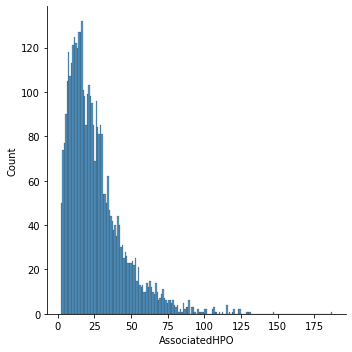

In [19]:
# Distribution of the number of associated HPO by disorder

sns.displot(agg_df, x = "AssociatedHPO", bins=187)

#### Exploring phenotype - disorder association

How many disorders one HPO is associated with?

In [27]:
# Check how many disorders one HPO is associated with
agg_df_byHPO = hpo_df.groupby(['AssociatedHPO']).aggregate({'DisorderName': 'count'})
agg_df_byHPO = agg_df_byHPO.sort_values(by='DisorderName')
print(agg_df_byHPO.head(10))
print(agg_df_byHPO.tail(10))

                                   DisorderName
AssociatedHPO                                  
1-2 finger syndactyly                         1
Bloodstream infectious agent                  1
Lower limb dysmetria                          1
Bloody mucoid diarrhea                        1
Blue cone monochromacy                        1
Lower eyelid coloboma                         1
Lower extremity joint dislocation             1
Lower cranial nerve dysfunction               1
Low-to-normal blood pressure                  1
Body odor                                     1
                            DisorderName
AssociatedHPO                           
Micrognathia                         451
Strabismus                           472
Hypertelorism                        484
Muscular hypotonia                   515
Scoliosis                            541
Microcephaly                         576
Global developmental delay           727
Short stature                        764
Intellectual d

In [30]:
agg_df_byHPO.describe()

,DisorderName
count,7684.000000
mean,13.387819
std,37.703441
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,961.000000


#### Distribution of the number of disorders one HPO is associaded with



TOTAL Amount of HPO: 7684
Amount of HPO with only 1 associated disorder: 2150
Amount of HPO with less than 5 associated disorders: 4458


Amount of HPO with more than a 10 associated disorders: 1817


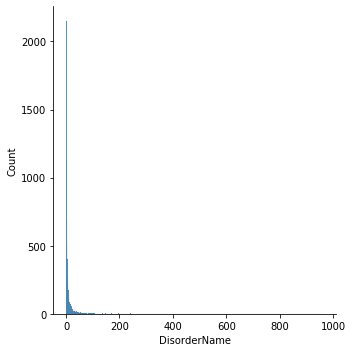

In [54]:
# Distribution of the number of disorders associated with 1 HPO

sns.displot(agg_df_byHPO, x = "DisorderName", bins=961)

print("\n")
print("TOTAL Amount of HPO:", len(agg_df_byHPO))
print("Amount of HPO with only 1 associated disorder:", len(agg_df_byHPO[(agg_df_byHPO.DisorderName == 1)]))
print("Amount of HPO with less than 5 associated disorders:", len(agg_df_byHPO[(agg_df_byHPO.DisorderName < 5)]))
print("\n")
print("Amount of HPO with more than a 10 associated disorders:", len(agg_df_byHPO[(agg_df_byHPO.DisorderName > 10)]))

More than half of rare diorders have 20 or more associated phenotypes. At the same time almost 30% of phenotypes have only 1 disorder to be associated with. And 58% has less than 5 rare disorders to be associated with. Therefore, we can determine a reasonably short list of possible rare disorders based on input of phenotypes.

### Genes dataset

In [10]:
# Converting XML file to pandas dataframe

data_for_df = []

root = ET.parse('genes.xml').getroot()
disorder_list = root.findall('DisorderList')[0]
disorders = disorder_list.findall('Disorder') 

#a = []

for disorder in disorders:
    disorder_name = disorder.findall('Name')[0].text
    disorder_type = disorder.findall('DisorderType')[0].findall('Name')[0].text
    disorder_group = disorder.findall('DisorderGroup')[0].findall('Name')[0].text
    #a.append(len(disorder.findall('Name')))
#print(max(a))

    disorder_gene_association_list = disorder.findall('DisorderGeneAssociationList')[0]
    disorder_gene_associations = disorder_gene_association_list.findall('DisorderGeneAssociation')
    
    for association in disorder_gene_associations:
        gene = association.findall('Gene')[0].findall('Name')[0].text
        gene_symbol = association.findall('Gene')[0].findall('Symbol')[0].text
        gene_type = association.findall('Gene')[0].findall('GeneType')[0].findall('Name')[0].text
        disorder_gene_association_type = association.findall('DisorderGeneAssociationType')[0].findall('Name')[0].text

        data_for_df.append({'DisorderName' : disorder_name,
                            'DisorderType' : disorder_type,
                            'DisorderGroup' : disorder_group,
                            'AccociatedGene' : gene,
                            'GeneSymbol' : gene_symbol,
                            'GeneType': gene_type,
                            'GeneTypeAssociation': disorder_gene_association_type})
        
gene_df = pd.DataFrame(data_for_df)  

#### Data Sample

In [11]:
gene_df.head()

,AccociatedGene,DisorderGroup,DisorderName,DisorderType,GeneSymbol,GeneType,GeneTypeAssociation
0,kinesin family member 7,Disorder,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,KIF7,gene with protein product,Disease-causing germline mutation(s) in
1,aspartylglucosaminidase,Disorder,Aspartylglucosaminuria,Disease,AGA,gene with protein product,Disease-causing germline mutation(s) in
2,CWC27 spliceosome associated protein homolog,Disorder,Brachydactyly-short stature-retinitis pigmento...,Malformation syndrome,CWC27,gene with protein product,Disease-causing germline mutation(s) in
3,sulfatase modifying factor 1,Disorder,Multiple sulfatase deficiency,Disease,SUMF1,gene with protein product,Disease-causing germline mutation(s) in
4,mannosidase beta,Disorder,Beta-mannosidosis,Disease,MANBA,gene with protein product,Disease-causing germline mutation(s) in


#### Basic Data Info

In [12]:
gene_df.describe()

,AccociatedGene,DisorderGroup,DisorderName,DisorderType,GeneSymbol,GeneType,GeneTypeAssociation
count,7864,7864,7864,7864,7864,7864,7864
unique,4200,3,3853,11,4200,3,10
top,lamin A/C,Disorder,Retinitis pigmentosa,Disease,LMNA,gene with protein product,Disease-causing germline mutation(s) in
freq,19,6216,82,4639,19,7749,4815


#### Unique Values:

In [14]:
print(gene_df['DisorderGroup'].unique())
print('\n')
print(gene_df['DisorderType'].unique())
print('\n')
print(gene_df['GeneType'].unique())
print('\n')
print(gene_df['GeneTypeAssociation'].unique())

['Disorder' 'Subtype of disorder' 'Group of disorders']


['Disease' 'Malformation syndrome' 'Clinical subtype'
 'Etiological subtype' 'Morphological anomaly' 'Biological anomaly'
 'Clinical syndrome'
 'Particular clinical situation in a disease or syndrome'
 'Histopathological subtype' 'Clinical group' 'Category']


['gene with protein product' 'Non-coding RNA' 'Disorder-associated locus']


['Disease-causing germline mutation(s) in'
 'Modifying germline mutation in' 'Major susceptibility factor in'
 'Candidate gene tested in'
 'Disease-causing germline mutation(s) (loss of function) in'
 'Disease-causing somatic mutation(s) in'
 'Disease-causing germline mutation(s) (gain of function) in'
 'Role in the phenotype of' 'Part of a fusion gene in'
 'Biomarker tested in']


#### Exploring disorder - gene association

In [26]:
# Check how many genes are associated with every disorder

agg_gene_df = gene_df.groupby(['DisorderName']).aggregate({'AccociatedGene': 'count'})
agg_gene_df = agg_gene_df.sort_values(by='AccociatedGene')

print("Disorders with lowest number of associated genes:")
print(agg_gene_df.head(10))
print('\n')
print("Disorders with highest number of associated genes:")
print(agg_gene_df.tail(10))

Disorders with lowest number of associated genes:
                                                    AccociatedGene
DisorderName                                                      
12p12.1 microdeletion syndrome                                   1
McLeod neuroacanthocytosis syndrome                              1
Meacham syndrome                                                 1
Medium chain acyl-CoA dehydrogenase deficiency                   1
Medulloblastoma with extensive nodularity                        1
Megaconial congenital muscular dystrophy                         1
Megalencephaly-capillary malformation-polymicro...               1
Megalencephaly-severe kyphoscoliosis-overgrowth...               1
Melanoma and neural system tumor syndrome                        1
Melnick-Needles syndrome                                         1


Disorders with highest number of associated genes:
                                                    AccociatedGene
DisorderName              

In [27]:
agg_gene_df.describe()

,AccociatedGene
count,3853.000000
mean,2.041007
std,3.596378
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,82.000000


#### Exploring gene - disorder association

In [29]:
# Check how many disorders one gene is associated with
agg_bygene_df = gene_df.groupby(['AccociatedGene']).aggregate({'DisorderName': 'count'})
agg_bygene_df = agg_bygene_df.sort_values(by='DisorderName')
print(agg_bygene_df.head(10))
print(agg_bygene_df.tail(10))

                                       DisorderName
AccociatedGene                                     
formimidoyltransferase cyclodeaminase             1
keratin 86                                        1
keratin 9                                         1
keratinocyte differentiation factor 1             1
keratocan                                         1
ketohexokinase                                    1
killer cell lectin like receptor C4               1
kinase D interacting substrate 220                1
kinase insert domain receptor                     1
kinase suppressor of ras 2                        1
                                                    DisorderName
AccociatedGene                                                  
paired box 6                                                  14
tumor protein p53                                             15
methylenetetrahydrofolate reductase                           16
major histocompatibility complex, class II, DR ... 

In [30]:
agg_bygene_df.describe()

,DisorderName
count,4200.000000
mean,1.872381
std,1.733329
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


### Epidemiology dataset

In [31]:
data_for_df = []

root = ET.parse('epidemiology.xml').getroot()
disorder_list = root.findall('DisorderList')[0]
disorders = disorder_list.findall('Disorder') 

for disorder in disorders:
    disorder_name = disorder.findall('Name')[0].text
    disorder_type = disorder.findall('DisorderType')[0].findall('Name')[0].text
    disorder_group = disorder.findall('DisorderGroup')[0].findall('Name')[0].text

    disorder_prevalence_list = disorder.findall('PrevalenceList')[0]
    disorder_prevalences = disorder_prevalence_list.findall('Prevalence')
    
    for prevalence in disorder_prevalences:
        prevalence_type = prevalence.findall('PrevalenceType')[0].findall('Name')[0].text
        prevalence_qualification = prevalence.findall('PrevalenceQualification')[0].findall('Name')[0].text
        prevalence_geographic = prevalence.findall('PrevalenceGeographic')[0].findall('Name')[0].text
        prevalence_validation = prevalence.findall('PrevalenceValidationStatus')[0].findall('Name')[0].text

        data_for_df.append({'DisorderName' : disorder_name,
                            'DisorderType' : disorder_type,
                            'DisorderGroup' : disorder_group,
                            'PrevalenceType' : prevalence_type,
                            'PrevalenceQualification' : prevalence_qualification,
                            'PrevalenceGeographic': prevalence_geographic,
                            'PrevalenceValidationStatus': prevalence_validation})
        
df_epidem = pd.DataFrame(data_for_df)  

#### Data Sample

In [32]:
df_epidem.head()

,DisorderGroup,DisorderName,DisorderType,PrevalenceGeographic,PrevalenceQualification,PrevalenceType,PrevalenceValidationStatus
0,Disorder,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Worldwide,Case,Cases/families,Validated
1,Disorder,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Worldwide,Class only,Point prevalence,Validated
2,Disorder,Alexander disease,Disease,Japan,Value and class,Annual incidence,Validated
3,Disorder,Alexander disease,Disease,Worldwide,Class only,Point prevalence,Not yet validated
4,Disorder,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Worldwide,Case,Cases/families,Validated


#### Basic Data Info

In [33]:
df_epidem.describe()

,DisorderGroup,DisorderName,DisorderType,PrevalenceGeographic,PrevalenceQualification,PrevalenceType,PrevalenceValidationStatus
count,15431,15431,15431,15431,15431,15431,15431
unique,3,6037,11,133,4,5,2
top,Disorder,Hemophilia A,Disease,Worldwide,Value and class,Point prevalence,Validated
freq,13176,110,9108,8225,6537,7352,13371


#### Unique values

In [35]:
print(df_epidem['DisorderGroup'].unique())
print('\n')
print(df_epidem['DisorderType'].unique())
print('\n')
print(df_epidem['PrevalenceQualification'].unique())
print('\n')
print(df_epidem['PrevalenceType'].unique())
print('\n')
print(df_epidem['PrevalenceValidationStatus'].unique())
print('\n')
print(df_epidem['PrevalenceGeographic'].unique())

['Disorder' 'Subtype of disorder' 'Group of disorders']


['Disease' 'Malformation syndrome' 'Clinical subtype' 'Clinical group'
 'Category' 'Particular clinical situation in a disease or syndrome'
 'Etiological subtype' 'Biological anomaly' 'Morphological anomaly'
 'Clinical syndrome' 'Histopathological subtype']


['Case' 'Class only' 'Value and class' 'Family']


['Cases/families' 'Point prevalence' 'Annual incidence'
 'Prevalence at birth' 'Lifetime Prevalence']


['Validated' 'Not yet validated']


['Worldwide' 'Japan' 'Europe' 'Australia' 'Norway' 'Netherlands'
 'Portugal' 'Czech Republic' 'Sweden' 'Finland' 'Specific population'
 'France' 'Germany' 'United Kingdom' 'Denmark' 'Italy' 'Austria'
 'United States' 'China' 'Turkey' 'Canada' 'Taiwan, Province of China'
 'Estonia' 'Colombia' 'Poland' 'Saudi Arabia' 'Brazil' 'Switzerland'
 'Tunisia' 'Korea, Republic of' 'Ireland' 'Belgium' 'Bulgaria' 'Croatia'
 'Hungary' 'Malta' 'Spain' 'Ukraine' 'Singapore' 'Greece'
 'Russian Federation

No handles with labels found to put in legend.


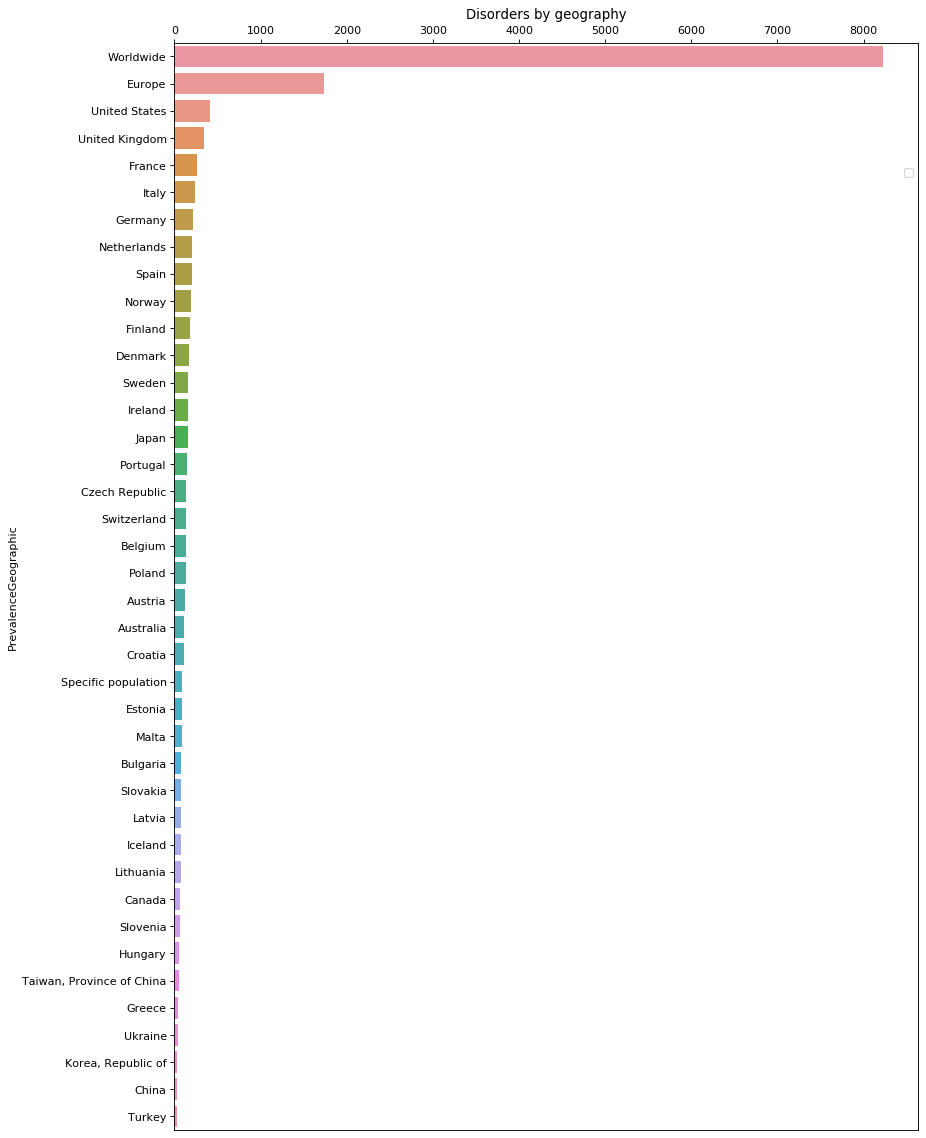

In [63]:
agg_df_epidem = df_epidem.groupby(['PrevalenceGeographic']).aggregate({'DisorderName': 'count'}).reset_index()
agg_df_epidem = agg_df_epidem.sort_values(by = 'DisorderName', ascending = False)
agg_df_epidem = agg_df_epidem.iloc[:40]

fig, ax = plt.subplots(figsize=(12,18), dpi=80)
sns.barplot(data = agg_df_epidem, x = 'DisorderName', y = 'PrevalenceGeographic')

ax.set_title('Disorders by geography')
ax.xaxis.tick_top()
ax.xaxis.label.set_visible(False)
ax.legend(bbox_to_anchor=[1.0, 0.89]);